About to rerun this but will alter the way obsids are stored, going to comment out old one and write new one in above it.  Revert if it doesn't work.

In [60]:
#Import all the tools we'll need
import pandas as pd
import geopandas as gp
import shapely as sp
from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np
from itertools import combinations
import intake
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt

In [2]:
#Michael's code, gets the polygon of an obsid
def get_outer_polygon_for_obsid(obsid, return_hull=True):
    tiles = pd.read_csv("tile_coordinates.csv")
    obsid_tiles = tiles.query("obsid == @obsid")
    cols = "BodyFixedCoordinateX BodyFixedCoordinateY".split()
    coords = obsid_tiles[cols]
    coords.columns = ["x", "y"]
    mp = MultiPoint(list(zip(coords.x, coords.y)))
    if return_hull:
        return mp.convex_hull
    else:
        return mp

In [ ]:
# #fixing interchecker code
# bucket4 = []
# bucket5 = []
# for num in bucket:
#     bucket4.append(bucket[0].intersection(bucket[num]))
#     bucket5.append((bucket[0].intersection(bucket[num])).area)
# if min(bucket5) == 0:
#     #set that combos area to zero
# if min(bucket5) < 0: 
#     print("Something went wrong, negative area")
# if min(bucket5) > 0:
#     x = bucket5.index(min(bucket5))
#     bucket6 = [min(bucket5)]
#     bucket = bucket.pop(x)
#     bucket = bucket.pop(0)
    
#     while min(bucket6) > 0:
#         s_p = bucket4[bucket5.index(min(bucket5))]
#         s_a = bucket5[bucket5.index(min(bucket5))]
#         bucket4 = []
#         bucket5 = []
        
#         for thing in bucket:
#             bucket4.append(s_p.intersection(thing))
#             bucket5.append((s_p.intersection(thing)).area)
#         bucket6 = min(bucket5)
#         x = bucket5.index(min(bucket5))
#         bucket = bucket.pop(x)
#         #set that combos area to the min here
        
    
    
    
    

In [134]:
#My code, goes through every possible combination of polygons and gives areas
def interchecker(polygon_array):
    """
    
    """
    bucket2 = []
    combos = []
    iterable1 = range(len(polygon_array)) 
    p = len(polygon_array)
    for n in iterable1:
        if p > 0:
            comb = list(combinations(iterable1,p))
            for item in comb:
                x = item
                combos.append(x)
            p = p-1
        else:
            end

    #the above gives us an array of each possible combination eg
    #combos = [comb[0],comb[1],...]
    #where comb[0] could be (0,1,2,4) or something of the sort
    
    for ele in combos:
        d = {}
        #print(ele) #shows the element used
        #d['region_name'] = region
        #d['index_used'] = ele #for testing
        bucket = []
        for number in ele:
            bucket.append(polygon_array[number])
            #bucket now [poly0, poly1, poly2, poly4] if using comb[0] above
        d['elements_used'] = bucket
        Multi = MultiPolygon(bucket)
        d['multipolygon'] = Multi
        if len(bucket)>1:
            #fixing interchecker code
            bucket4 = []
            bucket5 = []
            for num in bucket[1:]:
                bucket4.append(bucket[0].intersection(num))
                bucket5.append((bucket[0].intersection(num)).area)
            if min(bucket5) == 0:
                d["combo_area"] = 0
                print(0)
            if min(bucket5) < 0: 
                print("Something went wrong, negative area")
            if min(bucket5) > 0:
                x = bucket5.index(min(bucket5))
                bucket6 = [min(bucket5)]
                #print(bucket)
                bucket.pop(x)
               # print(bucket)
                bucket.pop(0)
                #print(bucket)
                #print(min(bucket6))
                while n > 0:
                    print(bucket5.index(min(bucket5)))
                    print(bucket5.index(min(bucket5)))
                    s_p = bucket4[bucket5.index(min(bucket5))] #save polygon
                    s_a = bucket5[bucket5.index(min(bucket5))] #save polygon area
                    bucket4 = []
                    bucket5 = []
                    if len(bucket) >= 1:
                        for thing in bucket:
                            bucket4.append(s_p.intersection(thing))
                            bucket5.append((s_p.intersection(thing)).area)
                        bucket6 = min(bucket5)
                        x = bucket5.index(min(bucket5))
                        bucket.pop(x)
                    if len(bucket) == 0:
                        d["combo_area"] = bucket6
                        print(bucket6)
                        bucket6 = 0
                        
                    if bucket6 > 0: 
                        n = 1
                    if bucket6 == 0:
                        n = 0

        #I want the code below but it doesnt like while with float here, put n as a way to get around it.

#                 while min(bucket6) > 0:
#                     s_p = bucket4[bucket5.index(min(bucket5))]
#                     s_a = bucket5[bucket5.index(min(bucket5))]
#                     bucket4 = []
#                     bucket5 = []
#                     if len(bucket) >= 1:
#                         for thing in bucket:
#                             bucket4.append(s_p.intersection(thing))
#                             bucket5.append((s_p.intersection(thing)).area)
#                         bucket6 = min(bucket5)
#                         x = bucket5.index(min(bucket5))
#                         bucket.pop(x)
#                         #set that combos area to the min here
#                     if len(bucket) == 0:
#                         d["combo_area"] = bucket6
#                         bucket6 = 0
                
        
        #end stuff I want to keep
            
            #need to change how I check intersections here
            #currently does piecewise, not the whole thing
            #must check every possible intersection.
            #try to reuse my combos code above to do so?
            #must re-learn how combos worked.
            
            #how I was doing it, piecewise
#             y = bucket[0].intersection(bucket[1])
#             for i in range(len(bucket)-2):
#                 y = y.intersection(bucket[i+2])
#             #print(y.area)
#             d["combo_area"]= y.area







        else:
            #print(bucket[0].area)
            d['combo_area'] = bucket[0].area
        #for number in ele:
            #d['elements_used'] = polygon_array[number]
            #must move elements used to get every element used- where?
        bucket2.append(d)
    return pd.DataFrame(bucket2)

In [79]:
olddata = pd.read_csv("n_obj_df.csv") #old dataframe we're comparing to
#updating n_obj_df (from calculate_fractional_coverage_new notebook)

In [80]:
olddata.head() #check it loaded in correctly

,Latitude,Ls,MY,Which,fraction,n_objects,obsid,pixel_area,region_name
0,-85.4074,214.785,29,both,0.115,933,ESP_012079_0945,2.551911e+07,Macclesfield
1,-85.4065,183.727,29,both,0.070,1971,ESP_011407_0945,2.592302e+06,Macclesfield
2,-85.4056,198.040,29,both,0.072,1525,ESP_011723_0945,8.455380e+06,Macclesfield
3,-85.4049,207.892,29,both,0.168,788,ESP_011934_0945,7.357966e+06,Macclesfield
4,-85.4067,235.282,29,both,0.111,1285,ESP_012501_0945,4.882627e+06,Macclesfield


In [81]:
testregion = 'Macclesfield' #set a test region

In [82]:
#Make a smaller df with areas, obsids, polygons, and region names
bucket = []
for obs in olddata[olddata['region_name'] == testregion].obsid.unique():
    d = {}
    d['region_name'] = testregion
    d['Obsid_Used'] = obs
    x = get_outer_polygon_for_obsid(obs)
    area = x.area
    d['Obsid_Area'] = area
    d['polygon_shape'] = x
    bucket.append(d)
results = pd.DataFrame(bucket)

In [83]:
results #show what we made immediately above

,Obsid_Area,Obsid_Used,polygon_shape,region_name
0,10.754545,ESP_012079_0945,"POLYGON ((-67.69881540000002 255.7925763, -68....",Macclesfield
1,2.720774,ESP_011407_0945,"POLYGON ((-79.4964947 242.6512937, -71.7773945...",Macclesfield
2,14.759485,ESP_011723_0945,"POLYGON ((-72.54717990000002 244.8776493, -72....",Macclesfield
3,5.338690,ESP_011934_0945,"POLYGON ((-68.00317840000001 256.1826178, -68....",Macclesfield
4,5.246979,ESP_012501_0945,"POLYGON ((-67.989408 256.1117836, -68.32543100...",Macclesfield
5,6.933368,ESP_012290_0945,"POLYGON ((-66.91617959999999 257.8571416, -67....",Macclesfield
6,7.428567,ESP_011406_0945,"POLYGON ((-66.20375920000001 254.0296356, -66....",Macclesfield
7,6.965716,ESP_021494_0945,"POLYGON ((-66.8270493 258.3039062, -66.9954035...",Macclesfield
8,5.204890,ESP_020782_0945,"POLYGON ((-66.48888240000001 259.2801681, -66....",Macclesfield
9,5.208502,ESP_020716_0945,"POLYGON ((-66.41012389999999 259.1488139, -66....",Macclesfield


In [84]:
from shapely.ops import cascaded_union

In [85]:
bucket = []
for poly in results.polygon_shape:
    bucket.append(poly)
test = MultiPolygon(bucket)
test2 = cascaded_union(test)

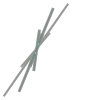

In [86]:
test2

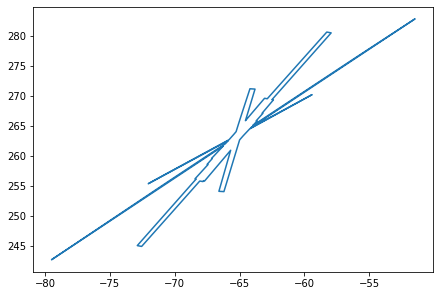

In [87]:
x, y = test2.exterior.xy
plt.plot(x,y);

In [88]:
#check this one, make polygons into multipolygons, make sure that it looks like hirise image
#make sure just mars year 29!

In [89]:
#smaller df with obs used, obsid
bucket = []
for obs in olddata[olddata['region_name'] == testregion].obsid.unique():
    d = {}
    d['obsid'] = obs #we dont want obs, want obs used in combo
    x = get_outer_polygon_for_obsid(obs)
    d['obs_poly'] = x
    bucket.append(d)
testresult = pd.DataFrame(bucket)

In [90]:
testresult #see what was created immediately above

,obs_poly,obsid
0,"POLYGON ((-67.69881540000002 255.7925763, -68....",ESP_012079_0945
1,"POLYGON ((-79.4964947 242.6512937, -71.7773945...",ESP_011407_0945
2,"POLYGON ((-72.54717990000002 244.8776493, -72....",ESP_011723_0945
3,"POLYGON ((-68.00317840000001 256.1826178, -68....",ESP_011934_0945
4,"POLYGON ((-67.989408 256.1117836, -68.32543100...",ESP_012501_0945
5,"POLYGON ((-66.91617959999999 257.8571416, -67....",ESP_012290_0945
6,"POLYGON ((-66.20375920000001 254.0296356, -66....",ESP_011406_0945
7,"POLYGON ((-66.8270493 258.3039062, -66.9954035...",ESP_021494_0945
8,"POLYGON ((-66.48888240000001 259.2801681, -66....",ESP_020782_0945
9,"POLYGON ((-66.41012389999999 259.1488139, -66....",ESP_020716_0945


In [91]:
df1 = testresult #rename for convenience

In [135]:
df2 = interchecker(testresult.obs_poly) #rename for convenience
#df2.head()
#print(len(df2)) #check it's length (it's what we wanted it to be) 

12
12
0
0
4
4
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.008637454843440322


KeyboardInterrupt: 

In [127]:
df2.head()
#this is the result of every possible combination of our polygons and their areas

,combo_area,elements_used,multipolygon
0,0.008637,[],"(POLYGON ((-67.69881540000002 255.7925763, -68..."
1,NaN,"[POLYGON ((-72.54717990000002 244.8776493, -72...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
2,NaN,"[POLYGON ((-79.4964947 242.6512937, -71.777394...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
3,NaN,"[POLYGON ((-79.4964947 242.6512937, -71.777394...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
4,NaN,"[POLYGON ((-79.4964947 242.6512937, -71.777394...","(POLYGON ((-67.69881540000002 255.7925763, -68..."


In [120]:
df2.elements_used[0]

[]

In [15]:
len(df1) #check length, what we expected as macclesfield has 14 hirise images

14

In [16]:
df1.head()

,obs_poly,obsid
0,"POLYGON ((-67.69881540000002 255.7925763, -68....",ESP_012079_0945
1,"POLYGON ((-79.4964947 242.6512937, -71.7773945...",ESP_011407_0945
2,"POLYGON ((-72.54717990000002 244.8776493, -72....",ESP_011723_0945
3,"POLYGON ((-68.00317840000001 256.1826178, -68....",ESP_011934_0945
4,"POLYGON ((-67.989408 256.1117836, -68.32543100...",ESP_012501_0945


In [17]:
x = 14+91+364+1001+2002+3003+3432+3003+2002+1001+364+91+14+1
print(x)#we expect this many combinations, and we get it! (= len(df2))
#make this pretty

16383


In [18]:
Testregion_inter = interchecker(results.polygon_shape)
#run interchecker on 'results', which is every obsid in the region

In [19]:
Testregion_inter.head() #check what it looks like, looks correct

,combo_area,elements_used,multipolygon
0,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
1,0.073851,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
2,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
3,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68..."
4,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68..."


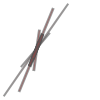

In [20]:
Testregion_inter.multipolygon[3]

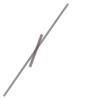

In [21]:
Testregion_inter.multipolygon[16300]

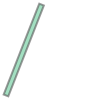

In [22]:
Testregion_inter.multipolygon[0][0]

In [23]:
results.Obsid_Area.max()

14.759485453249887

In [24]:
Testregion_inter.combo_area.max()
#the max area is still correct, nothing got made bigger at least

14.759485453249887

In [25]:
#Testregion_inter.combo_area.head()

In [26]:
bucket2 = []
for ele in Testregion_inter.index:
    #print(ele)
    polylist = Testregion_inter.elements_used[ele]
    bucket = []
    for poly in polylist:
        x = df1.obsid[df1['obs_poly'] == poly].values[0]
        bucket.append(x)
    bucket2.append(bucket)
Testregion_inter['obsids_used'] = np.array(bucket2)
#use olddata and Testregion_inter, combine so that we get a list of
#the obsids used which we add to our Testregion_inter dataframe

In [27]:
#THIS IS THE REAL ONE! Save!
# bucket2 = []
# for ele in Testregion_inter.index:
#     #print(ele)
#     polylist = Testregion_inter.elements_used[ele]
#     bucket = []
#     for poly in polylist:
#         x = df1.obsid[df1['obs_poly'] == poly].values[0]
#         bucket.append(x)
#     bucket = tuple(bucket)
#     bucket2.append(bucket)
# Testregion_inter['obsids_used'] = np.array(bucket2)


In [28]:
Testregion_inter.head() #check what we get, looks right!
#print(Testregion_inter.obsids_used[0])

,combo_area,elements_used,multipolygon,obsids_used
0,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
1,0.073851,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
2,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
3,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
4,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."


In [29]:
obsdf = Testregion_inter #rename this monstrosity

In [30]:
obsdf.head()

,combo_area,elements_used,multipolygon,obsids_used
0,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
1,0.073851,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
2,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
3,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."
4,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_..."


In [31]:
obsdf.obsids_used[4] == obsdf.obsids_used[3] #that's not good

False

In [32]:
len(obsdf)

16383

In [33]:
#this gives us the number of hirise images used in each combo
#num hirise is also num elements used, num obsids used
bucket = []
for i in range(len(obsdf.elements_used)): #change to range(len(obsdf.elements_used)) after we check
    #print(len(obsdf.elements_used[i])) #check it's what we want.
    obsdf.at[i, 'number_hirise'] = int(len(obsdf.elements_used[i]))
    #even calling it int(len) still gives float on df, but whatever.

In [34]:
obsdf.head()

,combo_area,elements_used,multipolygon,obsids_used,number_hirise
0,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",14.0
1,0.073851,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0
2,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0
3,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0
4,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0


In [35]:
#make a test cell, create cell with similar values (100's, 150's for areas)
#figure out if the areas are correct, see if they're square km or what
#do so in testing polygons

In [36]:
#add L_s values as a list, just as we added obsids used as a list
#gives L_s values for each obsid
bucket2 = []
for obslist in obsdf.obsids_used:
    bucket = []
    for obs in obslist:
        x = olddata.Ls[olddata['obsid'] == obs].values[0]
        bucket.append(x)
    bucket = tuple(bucket)
    bucket2.append(bucket)
obsdf['Ls_used'] = np.array(bucket2)
obsdf['region_name'] = testregion

In [37]:
obsdf.head() 

,combo_area,elements_used,multipolygon,obsids_used,number_hirise,Ls_used,region_name
0,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",14.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
1,0.073851,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
2,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
3,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
4,0.008637,"[POLYGON ((-67.69881540000002 255.7925763, -68...","(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield


In [38]:
obsdf = obsdf.drop(['elements_used'], axis = 1) #drop elements_used, don't need

In [39]:
obsdf = gp.GeoDataFrame(obsdf) #turn obsdf into a geodataframe

In [40]:
obsdf = obsdf.set_geometry('multipolygon') #assign the geometry column

In [41]:
obsdf.head() #make sure it looks right

,combo_area,multipolygon,obsids_used,number_hirise,Ls_used,region_name
0,0.008637,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",14.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
1,0.073851,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
2,0.008637,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
3,0.008637,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
4,0.008637,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield


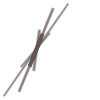

In [51]:
obsdf.multipolygon[0]

In [42]:
obsdf.to_csv('Macclesfield_duplicate_combodf.csv', index=False)
#turn this df into a csv, don't need index

In [43]:
combodf = pd.read_csv("Macclesfield_duplicate_combodf.csv")
#read in the exact same csv we created, this is obsdf read back in

In [44]:
combodf.head(2) #check our just read in file

,combo_area,multipolygon,obsids_used,number_hirise,Ls_used,region_name
0,0.008637,MULTIPOLYGON (((-67.69881540000002 255.7925763...,"['ESP_012079_0945', 'ESP_011407_0945', 'ESP_01...",14.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
1,0.073851,MULTIPOLYGON (((-67.69881540000002 255.7925763...,"['ESP_012079_0945', 'ESP_011407_0945', 'ESP_01...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield


In [45]:
obsdf.head(2) #check our original file.  Doesn't seem to match, obsdf has the proper multipolygon, this does not

,combo_area,multipolygon,obsids_used,number_hirise,Ls_used,region_name
0,0.008637,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",14.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield
1,0.073851,"(POLYGON ((-67.69881540000002 255.7925763, -68...","[ESP_012079_0945, ESP_011407_0945, ESP_011723_...",13.0,"(214.785, 183.727, 198.04, 207.892, 235.282, 2...",Macclesfield


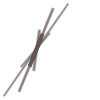

In [46]:
obsdf.multipolygon[0]

In [47]:
combodf.multipolygon[0] #oh no

'MULTIPOLYGON (((-67.69881540000002 255.7925763, -68.0397766 255.9241635, -68.2102417 255.9901059, -68.3806735 256.0561472, -66.51658209999999 260.8401089, -65.92657060000001 262.3506059, -65.7792438 262.727603, -65.4351928 263.6075048, -65.18990550000001 264.2344785, -64.9442308 264.8613011, -64.6979937 265.4875738, -64.40197689999999 266.2389609, -63.3174531 268.9907508, -63.07056650000001 269.6157661, -62.38826820000001 269.3496037, -67.5507085 256.169611, -67.6000533 256.0438146, -67.69881540000002 255.7925763)), ((-79.4964947 242.6512937, -71.77739459999999 253.8635486, -71.46847209999999 254.3115077, -70.84964120000002 255.2074994, -70.5397844 255.6551738, -70.22919159999999 256.1023187, -69.9174458 256.5497336, -56.8173104 275.3080391, -56.50581800000001 275.753868, -56.1930716 276.1998598, -55.87910890000001 276.6460092, -55.25149620000001 277.5366029, -54.9371813 277.9817438, -54.62269420000001 278.4268853, -53.6770012 279.7634786, -53.04730479999999 280.6534371, -51.4716348 2

In [48]:
#check with jmars results, what years does this catalog use?
#split up the catalog by year, so we have 2 per region, one for mars year 29, one for mars year 30
#test with this one first, make sure it looks like the hirise image.

#clean up notebook, make the tests with jmars, make sure that the obsids don't actually equal anymore which means checking combinatorics, and make it so we can split this by mars year.  Will have to figure out how to do this.